In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
plt.ion()

import os
import sys
import re
import pdb
import glob

num_possible_ss = 2*4**7

In [2]:
import weblogolib
from IPython.display import Image

In [3]:
RESULT_FILE_PATTERN = re.compile('(?P<directory>\S+)/results\.(?P<experiment>.*)\.txt')
EXPERIMENT_PATTERN = re.compile('(?P<locus>.+)_lib(?P<lib_num>[0-9]+)_rep(?P<rep_num>[0-9]+)')

class Result:
    ''' Class to hold information on a results file'''
    def __init__(self,file_name):
        self.valid=False
        m = re.match(RESULT_FILE_PATTERN,file_name)
        if m:
            self.data_file = file_name
            
            d1 = m.groupdict()
            self.directory = d1['directory']
            self.experiment = d1['experiment']
            self.report_file = '%s/report.results.%s.txt'%(self.directory,self.experiment)
            
            d2 = re.match(EXPERIMENT_PATTERN,self.experiment).groupdict()
            self.locus = d2['locus']
            self.lib_num = int(d2['lib_num'])
            self.rep_num = int(d2['rep_num'])
            self.valid=True

            # Read in data
            assert os.path.isfile(self.data_file)
            self.data_df = pd.read_csv(self.data_file,delim_whitespace=True)
            
            # Load report file
            assert os.path.isfile(self.report_file)
            with open(self.report_file) as f:
                self.report = f.read()

        
    def __repr__(self):
        return '%s_lib%d_rep%d'%(self.locus,self.lib_num,self.rep_num)

In [7]:
# Only load results for 9nt libraries
results_dir = '../from_pipeline'
results_glob = results_dir + '/results.*_9nt_*.txt'
results_dict = {}
file_names = glob.glob(results_glob)
for file_name in file_names:
    result = Result(file_name)
    if result.valid:
        name = repr(result)
        results_dict[name] = result
        print 'Loading %s ...'%name
print 'Done!'

Loading brca2_9nt_lib1_rep1 ...
Loading brca2_9nt_lib1_rep2 ...
Loading brca2_9nt_lib1_rep3 ...
Loading brca2_9nt_lib2_rep1 ...
Loading brca2_9nt_lib2_rep2 ...
Loading brca2_9nt_lib2_rep3 ...
Loading ikbkap_9nt_lib1_rep1 ...
Loading ikbkap_9nt_lib1_rep2 ...
Loading ikbkap_9nt_lib1_rep3 ...
Loading ikbkap_9nt_lib2_rep1 ...
Loading ikbkap_9nt_lib2_rep2 ...
Loading ikbkap_9nt_lib2_rep3 ...
Loading smn1_9nt_lib1_rep1 ...
Loading smn1_9nt_lib1_rep2 ...
Loading smn1_9nt_lib1_rep3 ...
Loading smn1_9nt_lib2_rep1 ...
Loading smn1_9nt_lib2_rep2 ...
Loading smn1_9nt_lib2_rep3 ...
Loading smn1_9nt_lib3_rep1 ...
Loading smn1_9nt_lib3_rep2 ...
Loading smn1_9nt_lib3_rep3 ...
Done!


In [8]:
def get_counts(results_dict, min_count=10): 

    # Get sorted list of results names
    names = results_dict.keys()
    names.sort()
    
    # Compute counts marginalized over all barcoees
    counts_df = pd.DataFrame()
    for name in names:
        result = results_dict[name]
        x = result.data_df.groupby(['ss']).sum()
        counts_df[name+'_ex_ct'] = x['ex_ct']
        counts_df[name+'_tot_ct'] = x['tot_ct']
        
    # Transform all 'T' to 'U' in index
    counts_df['rna_ss'] = [s.replace('T','U') for s in counts_df.index]
    counts_df.set_index('rna_ss',drop=True,inplace=True)

    return counts_df

counts_df = get_counts(results_dict)
counts_df.head()

,brca2_9nt_lib1_rep1_ex_ct,brca2_9nt_lib1_rep1_tot_ct,brca2_9nt_lib1_rep2_ex_ct,brca2_9nt_lib1_rep2_tot_ct,brca2_9nt_lib1_rep3_ex_ct,brca2_9nt_lib1_rep3_tot_ct,brca2_9nt_lib2_rep1_ex_ct,brca2_9nt_lib2_rep1_tot_ct,brca2_9nt_lib2_rep2_ex_ct,brca2_9nt_lib2_rep2_tot_ct,...,smn1_9nt_lib2_rep2_ex_ct,smn1_9nt_lib2_rep2_tot_ct,smn1_9nt_lib2_rep3_ex_ct,smn1_9nt_lib2_rep3_tot_ct,smn1_9nt_lib3_rep1_ex_ct,smn1_9nt_lib3_rep1_tot_ct,smn1_9nt_lib3_rep2_ex_ct,smn1_9nt_lib3_rep2_tot_ct,smn1_9nt_lib3_rep3_ex_ct,smn1_9nt_lib3_rep3_tot_ct
rna_ss,,,,,,,,,,,,,,,,,,,,,
AAAGAUAUU,0,0,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAGCAAAA,2,106,4,101,7,110,18.0,173.0,8.0,154.0,...,5.0,558.0,2.0,285.0,2.0,236.0,1.0,24.0,0.0,262.0
AAAGCAAAC,6,96,5,109,16,89,8.0,48.0,0.0,40.0,...,7.0,365.0,0.0,103.0,3.0,135.0,6.0,31.0,3.0,120.0
AAAGCAAAG,9,89,6,93,19,108,1.0,70.0,0.0,69.0,...,3.0,146.0,2.0,86.0,2.0,344.0,2.0,39.0,4.0,334.0
AAAGCAAAU,14,311,17,294,44,279,6.0,136.0,0.0,121.0,...,4.0,546.0,3.0,347.0,2.0,448.0,6.0,39.0,5.0,211.0


In [9]:
tot_cols = [c for c in counts_df.columns if 'tot_ct' in c]
tot_counts_sum = counts_df[tot_cols].sum(axis=0).astype(int)
print '\ntotal rna counts'
print tot_counts_sum

ex_cols = [c for c in counts_df.columns if 'ex_ct' in c]
ex_counts_sum = counts_df[ex_cols].sum(axis=0).astype(int)
print '\nexon rna counts'
print ex_counts_sum


total rna counts
brca2_9nt_lib1_rep1_tot_ct     6012874
brca2_9nt_lib1_rep2_tot_ct     5641526
brca2_9nt_lib1_rep3_tot_ct     5475257
brca2_9nt_lib2_rep1_tot_ct     6002292
brca2_9nt_lib2_rep2_tot_ct     5901192
brca2_9nt_lib2_rep3_tot_ct     7772292
ikbkap_9nt_lib1_rep1_tot_ct     269358
ikbkap_9nt_lib1_rep2_tot_ct    1971580
ikbkap_9nt_lib1_rep3_tot_ct    2108513
ikbkap_9nt_lib2_rep1_tot_ct    1568816
ikbkap_9nt_lib2_rep2_tot_ct    1315348
ikbkap_9nt_lib2_rep3_tot_ct    1449461
smn1_9nt_lib1_rep1_tot_ct      1326146
smn1_9nt_lib1_rep2_tot_ct      1576469
smn1_9nt_lib1_rep3_tot_ct      2030451
smn1_9nt_lib2_rep1_tot_ct      2663095
smn1_9nt_lib2_rep2_tot_ct      6498198
smn1_9nt_lib2_rep3_tot_ct      3301258
smn1_9nt_lib3_rep1_tot_ct      4494586
smn1_9nt_lib3_rep2_tot_ct       578883
smn1_9nt_lib3_rep3_tot_ct      3568634
dtype: int64

exon rna counts
brca2_9nt_lib1_rep1_ex_ct     2833258
brca2_9nt_lib1_rep2_ex_ct     3746826
brca2_9nt_lib1_rep3_ex_ct     3587556
brca2_9nt_lib2_rep1

In [10]:
# Compute ratios of normalized counts
names = results_dict.keys()
ratios_df = pd.DataFrame()
min_tot_ct = 10
for name in names:
    
    # Get counts for ex and tot samples
    ex_cts = counts_df[name+'_ex_ct'].fillna(0)
    tot_cts = counts_df[name+'_tot_ct'].fillna(0)
    
    # Compute total number of identified reads for ex and tot samples
    ex_ct_sum = sum(ex_cts)
    tot_ct_sum = sum(tot_cts)
    
    # Compute indices with valid min tot_ct valies
    indices = tot_cts >= min_tot_ct
    
    # Compute normalized ratios
    ratios_df[name] = ((ex_cts/tot_cts)*(tot_ct_sum/ex_ct_sum))[indices]

# Sort columns
cols = list(ratios_df.columns)
cols.sort()
ratios_df = ratios_df[cols]
    
ratios_df.head(5)

,brca2_9nt_lib1_rep1,brca2_9nt_lib1_rep2,brca2_9nt_lib1_rep3,brca2_9nt_lib2_rep1,brca2_9nt_lib2_rep2,brca2_9nt_lib2_rep3,ikbkap_9nt_lib1_rep1,ikbkap_9nt_lib1_rep2,ikbkap_9nt_lib1_rep3,ikbkap_9nt_lib2_rep1,...,ikbkap_9nt_lib2_rep3,smn1_9nt_lib1_rep1,smn1_9nt_lib1_rep2,smn1_9nt_lib1_rep3,smn1_9nt_lib2_rep1,smn1_9nt_lib2_rep2,smn1_9nt_lib2_rep3,smn1_9nt_lib3_rep1,smn1_9nt_lib3_rep2,smn1_9nt_lib3_rep3
rna_ss,,,,,,,,,,,,,,,,,,,,,
AAAGCAAAA,0.040042,0.059631,0.097121,0.094322,0.050539,0.491563,NaN,0.632694,0.046959,0.024547,...,0.011439,0.0,0.000000,0.000000,0.030997,0.042400,0.037771,0.038646,0.008604,0.000000
AAAGCAAAC,0.132640,0.069068,0.274369,0.151089,0.000000,0.493537,NaN,0.118807,0.047402,0.000000,...,0.049516,0.0,0.082416,0.071297,0.065780,0.090747,0.000000,0.101338,0.039965,0.091245
AAAGCAAAG,0.214609,0.097141,0.268495,0.012951,0.000000,0.385507,0.093042,0.174723,0.020936,0.000000,...,0.024423,0.0,0.165837,0.000000,0.028799,0.097229,0.125173,0.026513,0.010589,0.043710
AAAGCAAAU,0.095535,0.087063,0.240688,0.039994,0.000000,0.323096,0.116967,0.146409,0.097251,0.032101,...,0.000000,0.0,0.027658,0.081398,0.018855,0.034665,0.046534,0.020358,0.031767,0.086488
AAAGCAACA,0.103524,0.122496,0.168970,0.060436,0.023537,0.288068,NaN,0.230071,0.041872,0.008077,...,0.020616,0.0,0.049450,0.000000,0.156449,0.047796,0.000000,0.065615,0.090338,0.087947


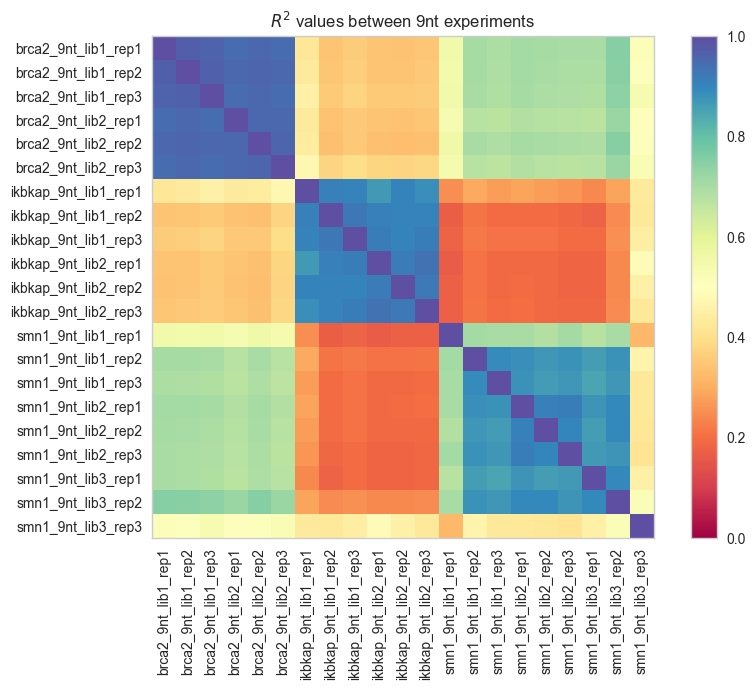

In [12]:
# Compute correlation coefficients for ratios greater than a given cutoff
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=[9,7])
cols = ratios_df.columns
num_samples = len(cols)
rhos = ratios_df.corr()
plt.imshow(rhos**2,interpolation='nearest',vmin=0,vmax=1)
plt.xticks(range(num_samples),cols,rotation='vertical')
plt.yticks(range(num_samples),cols)
plt.colorbar()
plt.set_cmap('Spectral')
plt.title('$R^2$ values between 9nt experiments')
plt.tight_layout()
plt.savefig('../plots/experiment_correlations_9nt.pdf')

In [ ]:
x_col = 'smn1_9nt_lib1_rep2'
y_col = 'smn1_9nt_lib2_rep1'
plt.plot(ratios_df[x_col],ratios_df[y_col],'.')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [ ]:
# Remove bad samples
del ratios_df['smn1_9nt_lib1_rep1']
del ratios_df['smn1_9nt_lib3_rep3']

In [ ]:
# Compute median ratios across replicates and libraries
median_ratios_df = pd.DataFrame()
experiments = ['brca2_9nt','smn1_9nt','ikbkap_9nt']
for experiment in experiments:
    ratio_cols = [c for c in ratios_df.columns if experiment in str(c)]
    tmp_df = ratios_df[ratio_cols]
    medians = tmp_df.median(axis=1,skipna=True)
    median_ratios_df[experiment] = medians
    
median_ratios_df.head()

In [ ]:
print 'Before filtering: num splice sites == %d'%len(median_ratios_df)

# Clean out shifted splice sites
pattern = re.compile('.GUG[UC]....')
all_ss = median_ratios_df.index.values
ok_ss = [ss for ss in all_ss if not re.match(pattern,ss)]
median_ratios_df = median_ratios_df.loc[ok_ss,:]

print 'After filtering: num splice sites == %d'%len(median_ratios_df)

In [ ]:
# Normalize each column to expression of consensus splice site
cons_seq = 'CAGGUAAGU'
cols = median_ratios_df.columns
for n, col in enumerate(cols):  
    ratio_cons = median_ratios_df.loc[cons_seq,col]
    median_ratios_df[col] /= ratio_cons

In [ ]:
# Extract strongest few smn1 and brca2 and ikbkap splice sites
cols = median_ratios_df.columns
for col in cols:
    print '\nShowing top splice sites for %s'%col
    df = median_ratios_df.sort_values(by=col,ascending=False).head(10)
    print df[col]

In [ ]:
# Compare splice site median ratios to each other and to computational predictions
plt.figure(figsize=[5,4])
cols = median_ratios_df.columns
num_samples = len(cols)
rhos = median_ratios_df.corr()
plt.imshow(rhos**2,interpolation='nearest',vmin=0,vmax=1)
plt.xticks(range(num_samples),cols,rotation='vertical')
plt.yticks(range(num_samples),cols)
plt.colorbar()
plt.set_cmap('Spectral')
plt.title('$R^2$ values between loci (9nt)')
plt.tight_layout()
plt.savefig('plots/loci_correlations_9nt.pdf')

In [ ]:
# Make scatter plots of selected pairs from the locus-computation comparision matrix
plt.figure(figsize=[9,3.5])

pairs = [
    ('brca2_9nt','smn1_9nt'),
    ('brca2_9nt','ikbkap_9nt'),
    ('smn1_9nt','ikbkap_9nt')
    ]

from scipy.stats import pearsonr
for n, (x_col,y_col) in enumerate(pairs):
    plt.subplot(1,3,n+1)
    tmp_df = median_ratios_df[[x_col,y_col]].dropna()
    xs = tmp_df[x_col]
    ys = tmp_df[y_col]
    #if y_col=='comp_maxent':
    #    ys = np.exp(ys)/(1+np.exp(ys))
    rho,p = pearsonr(xs,ys)
    plt.title('%s vs. %s\n$R^2$=%.3f'%(y_col, x_col, rho**2))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    if '9nt' in x_col:
        plt.xticks([0,1])
        plt.xlim([0,1.5])
        #plt.axvline(1,color='tomato',linestyle=':')
    if '9nt' in y_col:
        plt.yticks([0,1])
        plt.ylim([0,1.5])
        #plt.axhline(1,color='tomato',linestyle=':')
    plt.plot(xs,ys,'.',alpha=.2)
    plt.plot(xs[cons_seq],ys[cons_seq],'ok')
    #plt.xticks([])
    #plt.yticks([])
plt.tight_layout()
plt.savefig('plots/scatter_loci_9nt.png',dpi=300)

In [ ]:
# Load predictions
col_indices = [0,2,4,6,8]
col_names = ['ss','comp_maxent','comp_mdd','comp_mm','comp_wmm']
prediction_df = pd.read_csv('data/scored_splice_sites.txt',delim_whitespace=True,usecols=col_indices,names=col_names)
prediction_df['ss'] = [ss.replace('T','U') for ss in prediction_df['ss']]
prediction_df.set_index('ss',inplace=True,drop=True)

# Merge predictions and median ratios
merged_df = median_ratios_df.merge(prediction_df,left_index=True,right_index=True,how='inner')
merged_df.head()

In [ ]:
# Compare splice site median ratios to each other and to computational predictions
plt.figure(figsize=[7,6])
cols = merged_df.columns
num_samples = len(cols)
rhos = merged_df.corr()
plt.imshow(rhos**2,interpolation='nearest',vmin=0,vmax=1)
plt.xticks(range(num_samples),cols,rotation='vertical')
plt.yticks(range(num_samples),cols)
plt.colorbar()
plt.set_cmap('Spectral')
plt.title('$R^2$ values between loci and comp. predictions')
plt.tight_layout()
plt.savefig('plots/loci_comp_correlations_9nt.pdf')

In [ ]:
# Make scatter plots of selected pairs from the locus-computation comparision matrix
plt.figure(figsize=[9,6])

pairs = [
    ('brca2_9nt','smn1_9nt'),
    ('brca2_9nt','ikbkap_9nt'),
    ('smn1_9nt','ikbkap_9nt'),
    ('brca2_9nt','comp_maxent'),
    ('smn1_9nt','comp_maxent'),
    ('ikbkap_9nt','comp_maxent')
    ]

from scipy.stats import pearsonr
for n, (x_col,y_col) in enumerate(pairs):
    plt.subplot(2,3,n+1)
    tmp_df = merged_df[[x_col,y_col]].dropna()
    xs = tmp_df[x_col]
    ys = tmp_df[y_col]
    #if y_col=='comp_maxent':
    #    ys = np.exp(ys)/(1+np.exp(ys))
    rho,p = pearsonr(xs,ys)
    plt.title('%s vs. %s\n$R^2$=%.3f'%(y_col, x_col, rho**2))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    if '9nt' in x_col:
        plt.xticks([0,1])
        plt.xlim([0,1.5])
        #plt.axvline(1,color='tomato',linestyle=':')
    if '9nt' in y_col:
        plt.yticks([0,1])
        plt.ylim([0,1.5])
        #plt.axhline(1,color='tomato',linestyle=':')
    plt.plot(xs,ys,'.',alpha=.2)
    plt.plot(xs[cons_seq],ys[cons_seq],'ok')
    #plt.xticks([])
    #plt.yticks([])
plt.tight_layout()
plt.savefig('plots/scatter_9nt.png',dpi=300)

In [ ]:
pct_threshold = 5

plt.figure(figsize=[12,4])
cols = median_ratios_df.columns
for n, col in enumerate(cols):  
    pcts = 100*median_ratios_df[col].dropna().values
    pcts[pcts > 100] = 100
    
    plt.subplot(1,len(cols),n+1)
    indices = pcts > pct_threshold
    plt.hist(pcts,20)
    plt.xlabel('percent of cons')
    plt.ylabel('num splice sites')
    plt.xlim([0,100])
    plt.ylim([0,550])
    plt.axvline(pct_threshold,linestyle=':',color='tomato')
    plt.title('%s ss above %d%% of cons: %d'%(col, pct_threshold, sum(indices)))
    
plt.tight_layout()
plt.savefig('plots/activity_histogram_9nt.pdf')

In [ ]:
tmp_df = merged_df[[x_col,y_col]].dropna()
tmp_df.head()

In [ ]:
plt.figure(figsize=[12,4])
pairs = [(0,1),(0,2),(1,2)]
num_pairs = len(pairs)

wt_ss_dict = {'brca2':     'CAGGCAAGU', 
              'ikbkap':    'CAAGUAAGU', 
              'smn1':      'GGAGUAAGU', 
              'cons':      'CAGGUAAGU', 
              'ikbkap_mut':'CAAGUAAGC'}

#activity_thresolds = {'brca2_9nt':12, 'smn1_9nt':12, 'ikbkap_9nt':50}

brca2_threshold = .5
smn1_threshold = .5
ikbkap_threshold = .2

indices1 = (median_ratios_df['brca2_9nt'].values > brca2_threshold) \
    & (median_ratios_df['smn1_9nt'].values > smn1_threshold) \
    & (median_ratios_df['ikbkap_9nt'].values > ikbkap_threshold)
    
indices2 = (median_ratios_df['brca2_9nt'].values > brca2_threshold) \
    & (median_ratios_df['smn1_9nt'].values > smn1_threshold) \
    & (median_ratios_df['ikbkap_9nt'].values <= ikbkap_threshold) 
    
indices0 = ~(indices1 | indices2)

cols = median_ratios_df.columns
for n, pair in enumerate(pairs):
    x_col = cols[pair[0]]
    y_col = cols[pair[1]]    
    xs = median_ratios_df[x_col].values
    ys = median_ratios_df[y_col].values

    plt.subplot(1,num_pairs,n+1)
    plt.plot(xs[indices0],ys[indices0],'.k',label=None)
    plt.plot(xs[indices1],ys[indices1],'.b',label=None)
    plt.plot(xs[indices2],ys[indices2],'.g',label=None)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    for name in wt_ss_dict:
        ss = wt_ss_dict[name]
        x = median_ratios_df.loc[ss,x_col]
        y = median_ratios_df.loc[ss,y_col]
        plt.plot(x,y,'o',label=name, markeredgecolor='k', markersize=10, markeredgewidth=1)
        
    plt.legend()
    
plt.tight_layout()
plt.savefig('plots/scatter_9nt_colored.png', dpi=300)

In [ ]:
# Write selected sites to disk in fasta format
def make_logo(seqs,out_file_base):
    '''
    Creates a weblogo for a set of sites.
    Makes 2 output files, one with .pdf extension
    and one with .png extension
    '''
    
    out_file_png = out_file_base+'.png'
    out_file_pdf = out_file_base+'.pdf'
        
    # Write sites to tmp fasta file
    tmp_sites_file = 'tmp.sites.fa'
    site_entries = ['>%d\n%s\n'%(num,site) for (num,site) in enumerate(sites)]
    with open(tmp_sites_file,'w') as f:
         f.write(''.join(site_entries))
            
    # Read in sequences from tmp fasta file
    fin = open(tmp_sites_file)
    seqs = weblogolib.read_seq_data(fin)
    os.remove(tmp_sites_file)
    
    # Create weblogo and save as tmp pdf file
    data = weblogolib.LogoData.from_seqs(seqs)
    options = weblogolib.LogoOptions()
    options.color_scheme = weblogolib.classic
    logo_format = weblogolib.LogoFormat(data,options)
    pdf = weblogolib.pdf_formatter(data,logo_format)
    with open(out_file_pdf,'w') as fout:
        fout.write(pdf)
        
    # Convert tmp pdf file to out_file (a png file)
    command = 'sips -s format png %s --out %s '%(out_file_pdf,out_file_png)
    os.system(command)

In [ ]:
# Create logos 
plt.figure(figsize=[12,9])

for n, (name, sites) in enumerate(sites_dict.iteritems()):
    logo_file = 'logos/logo_%s'%name
    make_logo(sites,logo_file)
    print 'High in %s: %d sites'%(col,len(sites))
    image_file = logo_file+'.png'
    image = mpimg.imread(image_file)
    plt.subplot(3,3,n+1)
    plt.imshow(image) 
    plt.axis('off')
    plt.title('%s (%d sites)'%(name,len(sites)))
    
plt.savefig('plots/logos_9nt_11nt_libs.png', dpi=300)

In [ ]:
logo_file = 'logos/logo_brca2'
indices = median_ratios_df['brca2_9nt'] > brca2_threshold
sites = median_ratios_df.index[indices]
make_logo(sites,logo_file)
print 'High in brca2: %d sites'%indices.sum()
Image(filename=logo_file+'.png',height=200) 

In [ ]:
logo_file = 'logos/logo_smn1'
indices = median_ratios_df['smn1_9nt'] > smn1_threshold
sites = median_ratios_df.index[indices]
make_logo(sites,logo_file)
print 'High in smn2: %d sites'%indices.sum()
Image(filename=logo_file+'.png',height=200) 

In [ ]:
logo_file = 'logos/logo_ikbkap'
indices = median_ratios_df['ikbkap_9nt'] > ikbkap_threshold
sites = median_ratios_df.index[indices]
make_logo(sites,logo_file)
print 'High in ikdbkap2: %d sites'%indices.sum()
Image(filename=logo_file+'.png',height=200) 

In [ ]:
logo_file = 'logos/logo_bhi_shi_ihi'
sites = median_ratios_df.index[indices1]
make_logo(sites,logo_file)
print 'High in brca2 and smn1, high in ikbkap: %d sites'%indices1.sum()
Image(filename=logo_file+'.png',height=200) 

In [ ]:
logo_file = 'logos/logo_bhi_shi_ilow'
sites = median_ratios_df.index[indices2]
make_logo(sites,logo_file)
print 'High in brca2 and smn1, low in ikbkap: %d sites'%indices2.sum()
Image(filename=logo_file+'.png',height=200) 

In [ ]:
-------

In [ ]:
get_name = lambda col: '_'.join(col.split('_')[:-2])

def ratios_from_counts(counts_df, min_tot_ct = 10):
    ''' Compute ratios from a set of counts. '''
    
    # Initialize dataframe
    ratios_df = pd.DataFrame()
    
    # Get list of experiments
    names = list(set([get_name(c) for c in counts_df.columns]))
    names.sort()
    
    # Compute ratios for each experiment
    for name in names:

        # Get counts for ex and tot samples
        try:
            ex_cts = counts_df[name+'_ex_ct'].fillna(0)
            tot_cts = counts_df[name+'_tot_ct'].fillna(0)
        except:
            pdb.set_trace()

        # Compute total number of identified reads for ex and tot samples
        ex_ct_sum = sum(ex_cts)
        tot_ct_sum = sum(tot_cts)

        # Compute indices with valid min tot_ct valies
        indices = tot_cts >= min_tot_ct

        # Compute normalized ratios
        ratios_df[name] = ((ex_cts/tot_cts)*(tot_ct_sum/ex_ct_sum))[indices]
    
    return ratios_df